In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [327]:
data=pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [328]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

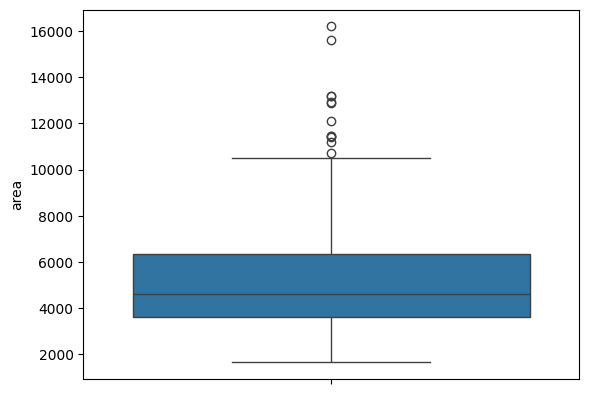

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data['area'])
plt.show()

In [330]:
Q1 = data['price'].quantile(0.30)
Q3 = data['price'].quantile(0.70)
Q2 = data['area'].quantile(0.30)
Q4 = data['area'].quantile(0.70)
IQR1 = Q3 - Q1
IQR2 = Q4 - Q2
data = data[~((data['area'] < (Q2 - 1.5 * IQR2)) |(data['area'] > (Q4 + 1.5 * IQR2)))]
data = data[~((data['price'] < (Q1 - 1.5 * IQR1)) |(data['price'] > (Q3 + 1.5 * IQR1)))]

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
34,8120000,6840,5,1,2,yes,yes,yes,no,yes,1,no,furnished
35,8080940,7000,3,2,4,yes,no,no,no,yes,2,no,furnished
36,8043000,7482,3,2,3,yes,no,no,yes,no,1,yes,furnished
37,7980000,9000,4,2,4,yes,no,no,no,yes,2,no,furnished
38,7962500,6000,3,1,4,yes,yes,no,no,yes,2,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


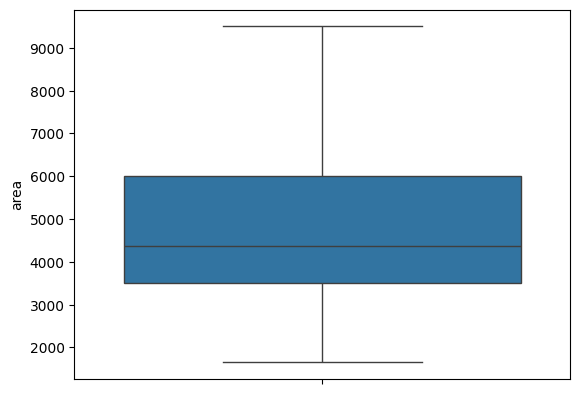

In [331]:
sns.boxplot(data['area'])
plt.show()

In [332]:
data = data.dropna()
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
34,8120000,6840,5,1,2,yes,yes,yes,no,yes,1,no,furnished
35,8080940,7000,3,2,4,yes,no,no,no,yes,2,no,furnished
36,8043000,7482,3,2,3,yes,no,no,yes,no,1,yes,furnished
37,7980000,9000,4,2,4,yes,no,no,no,yes,2,no,furnished
38,7962500,6000,3,1,4,yes,yes,no,no,yes,2,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [333]:
X = data[['area']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [334]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [335]:
y_pred = model.predict(X_test)

In [336]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1622292002064.34
R-squared: 0.32


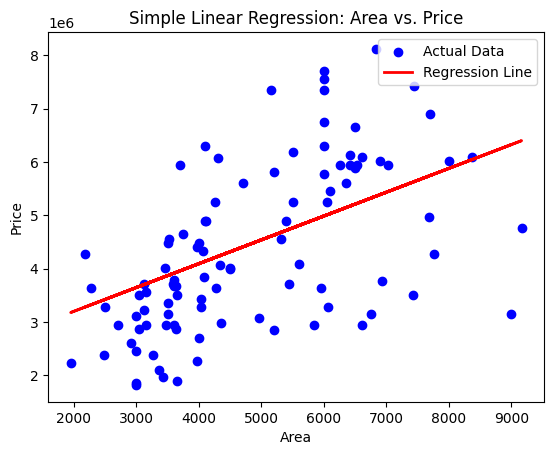

In [337]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line', linewidth=2)
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.title('Simple Linear Regression: Area vs. Price')
plt.show()